- Anticipating the strength or weakness of the U.S. dollar can make a big difference to investors. A weak dollar favors commodities and emerging markets, while a strong dollar favors U.S. stocks and bonds.
- In 2013, the Fed finally changed course and began a period of strengthening the U.S. dollar. The first event was the taper tantrum that sent Treasury yields higher after the Fed reduced the pace of quantitative easing. Initially, many investors were skeptical that the Fed would stick to a course of tighter monetary policy. By 2014, the change in the tide became clear. Prices for many commodities, including oil and natural gas, began to fall. The Fed steadily tightened monetary policy until starting rate cuts in 2019.

In [154]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from utils import get_dividends as get_divs
import matplotlib.pyplot as plt
import random
import seaborn as sns
import time
from scipy.ndimage import gaussian_filter
from scipy.stats.stats import pearsonr 


# To create datetime objects 
import datetime

# To grab stock data
import yfinance as fyf
from pandas_datareader import data as pdr
fyf.pdr_override() # <-- Here is the fix

In [155]:
start = datetime.datetime(2012, 2, 1)
end   = datetime.datetime(2020, 6, 9)

oil = ['CL=F', 'RUBUSD=X']
df = pdr.get_data_yahoo(oil, start=start, end=end)
dur_days = (df.index[-1] - df.index[0]).days
dur_years = dur_days/365
print('Duration: {} Days ({:.1f} Years)'.format(dur_days, dur_years))

del df['Adj Close']
del df['Volume']
del df['Open']
del df['Close']

for stock in oil:
    df[stock] = df.loc[:, pd.IndexSlice[:, stock]].mean(axis=1)
    
del df['High']
del df['Low']

imputer = KNNImputer(n_neighbors=1)
imp = imputer.fit_transform(df)
df['CL=F'] = imp[:,0]
df['RUBUSD=X'] = imp[:,1]

df['CL=F'] = gaussian_filter(df['CL=F'].values, sigma=3)
df['RUBUSD=X'] = gaussian_filter(df['RUBUSD=X'].values, sigma=3)

[*********************100%***********************]  2 of 2 completed
Duration: 3051 Days (8.4 Years)


(734503.0, 737425.0)

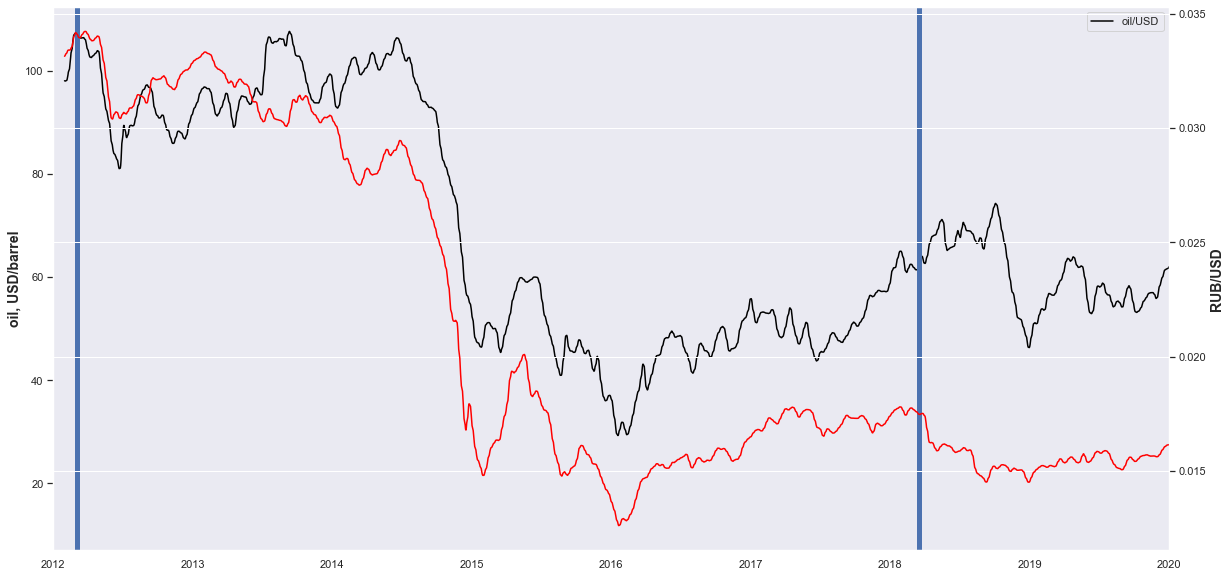

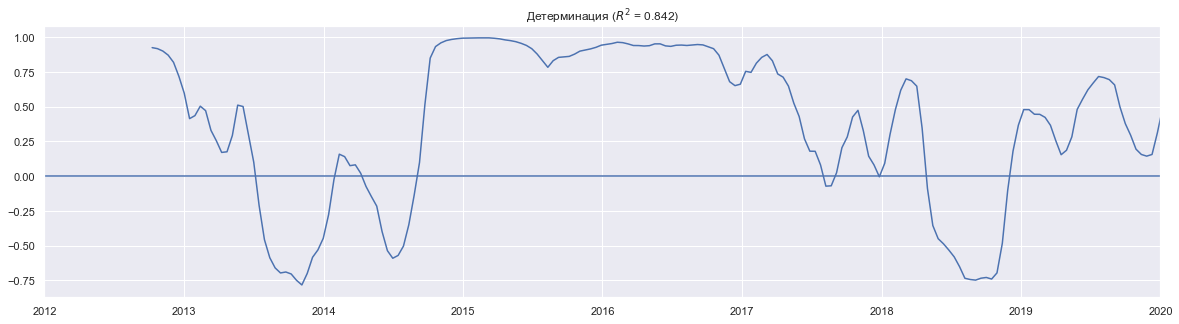

In [156]:
import random
styles = ['--', '-.', ':']
widths = [1,2,3]
colors = ['red', 'green', 'black', 'blue']
# df.plot(y=oil, figsize=(20,10))
plt.figure(figsize=(20,10))

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df['CL=F'], c='black', label='oil/USD')
ax2.plot(df['RUBUSD=X'], c='red', label='RUR/USD')

for key in events.keys():
    date = datetime.datetime(*[int(i) for i in key.split('-')])
#     plt.axvline(date, label=events[key], linewidth=random.choice(widths), linestyle=random.choice(styles), color=random.choice(colors))
for i, date in enumerate(elections):
    ax1.axvline(datetime.datetime.strptime(date, "%b %d, %Y"), linewidth=5)
# plt.ylim(-100,100)
ax1.set_xlim(datetime.datetime(year=2012, month=1, day=1),datetime.datetime(year=2020, month=1, day=1))
ax1.legend()
ax1.grid()
ax1.set_ylabel('oil, USD/barrel', weight='bold', fontsize=14)
ax2.set_ylabel('RUB/USD', weight='bold', fontsize=14)
# ax2.legend()

# correlation in 180-day windows (overlapping by 10 days)
plt.figure(figsize=(20,5))
plt.title('Детерминация ($R^2$ = {:.3f})'.format((pearsonr(df['CL=F'].values, df['RUBUSD=X'].values)[0])**2))
C, D = [], []
for i in np.arange(0, len(df['CL=F'].values)-180, 10):
    C.append(pearsonr(df['CL=F'].values[i:i+180], df['RUBUSD=X'].values[i:i+180])[0])
    D.append(df.index[i+180])
plt.plot(D,C)
plt.axhline(0)
plt.xlim(datetime.datetime(year=2012, month=1, day=1),datetime.datetime(year=2020, month=1, day=1))


In [157]:
events = {
'2014-03-01': 'Аннексия Крыма',
'2014-04-01': 'Начало боёв в Луганске',
'2014-07-01': 'Секторальные санкции США против РФ',
'2014-08-01': 'РФ запретила импорта из США',
'2015-09-01': 'Начало кампании РФ в Сирии',
'2017-08-01': 'Новые санкции против РФ',
'2018-02-01': '13 новых российских шишек под санкциями',
'2018-03-01': 'Новые санкции против окружения Путина, Путин пошел на новый срок',
'2018-04-01': 'Санкции против российских олигархов',
'2018-06-01': 'Новый пакет санкций против РФ компаний',
'2018-08-01': 'Санкции за скрипаля, запрет на трансфер технологий в РФ',
'2018-09-01': 'Новый пакет санкций, черный список компаний.',
'2019-02-01': 'Посадка Калви',
'2019-03-01': 'Ввели санкции (6 физлиц и 8 юрлиц) за керченский инцидент.',
'2019-08-01': 'Новые санкции за Скрипаля',
'2019-12-01': 'Санкции против всех участников Сев. Потока 2',
'2020-01-01': 'Анонс поправок в конституцию РФ'}

In [158]:
events = {
'2014-02-01': 'Янукович бежит в РФ',
'2014-03-01': 'Аннексия Крыма',
'2014-04-01': 'Начало боёв в Луганске',
'2014-07-01': 'Секторальные санкции США против РФ',
'2014-08-01': 'РФ запретила импорта из США',
'2015-02-01': 'Минские соглашения',
'2015-03-01': 'Выход РФ из ДОВСЕ',
'2015-09-01': 'Начало кампании РФ в Сирии',
'2015-11-01': 'Переговоры по Сирии',
'2016-03-01': 'Отказ РФ от саммита по ядерной без',
'2016-09-01': 'Анонс плана мира в Сирии',
'2016-10-01': 'Выход РФ из договора по плутонию',
'2016-11-01': 'Избран Трамп (pro-Russia)',
'2016-12-01': 'Хакеры якобы вмешались в выборы,',
'2017-01-01': 'В выборах Трампа виноват Путин',
'2017-05-01': 'Расследование Трампа',
'2017-06-01': 'Вступление Черногории в НАТО',
'2017-07-01': 'Анонс перемирия в Сирии',
'2017-08-01': 'Новые санкции против РФ',
'2017-12-01': 'Начало продажи оружия Украине ',
'2018-01-01': 'Китай и РФ - соперники',
'2018-02-01':  'РФ кибератакует США, Пригожина поймали в Сирии, 13 новых российских шишек под санкциями',
'2018-03-01': 'Путин пугает мир новым оружием в ПФС, новые санкции против окружения Путина, Путин пошел на новый срок',
'2018-04-01': 'Санкции против российских олигархов',
'2018-05-01': 'Опять РФ вмешалась в выборы',
'2018-06-01': 'Новый пакет санкций против РФ компаний',
'2018-07-01': 'Встреча Путина Трампа',
'2018-08-01': 'Санкции за скрипаля, запрет на трансфер технологий в РФ',
'2018-09-01': 'Новый пакет санкций, черный список компаний.',
'2018-11-01': 'РФ захватывает украинские корабли. Новые кибервойны.',
'2018-12-01': 'Анонс вывода войск из Сирии',
'2019-02-01': 'Посадка Калви',
'2019-03-01': 'Ввели санкции (6 физлиц и 8 юрлиц) за керченский инцидент.',
'2019-04-01': 'Турция покупает С-400 (РФ запускает ПЛАРБ Белгород)',
'2019-05-01': 'Тёрки по Венесуэле',
'2019-08-01': 'Новые санкции за Скрипаля',
'2019-10-01': 'Вывод американских из Сирии',
'2019-12-01': 'Санкции против всех участников Сев. Потока 2',
'2020-01-01': 'Анонс поправок в конституцию РФ'}

In [159]:
elections = ['Mar 26, 2000', 'Mar 14, 2004', 'Mar 2, 2008', 'Mar 4, 2012', 'Mar 18, 2018']

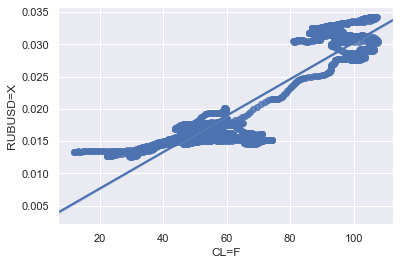

In [163]:
import seaborn as sns
from sklearn.utils import shuffle
sns.set(color_codes=True)
df = shuffle(df)
sns.regplot(x='CL=F', y='RUBUSD=X', data=df);